## Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the data
import os
os.getcwd()
os.chdir("C:\\Users\\hp\\Documents\\Praxis_Docs\\GOURAB_SIR_PYTHON_ML\\ML")

fram = pd.read_csv("framingham.csv")

In [6]:
fram.shape

(4240, 16)

In [124]:
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
fram.head(16)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [8]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 1. The isnul() method

In [9]:
fram.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
type(fram.isnull())

pandas.core.frame.DataFrame

In [11]:
fram.sum()

male                 1820.00
age                210220.00
education            8185.00
currentSmoker        2095.00
cigsPerDay          37924.00
BPMeds                124.00
prevalentStroke        25.00
prevalentHyp         1317.00
diabetes              109.00
totChol            991771.00
sysBP              561183.50
diaBP              351486.50
BMI                108905.18
heartRate          321651.00
glucose            315724.00
TenYearCHD            644.00
dtype: float64

In [126]:
#Getting the number of missing values
fram['cigsperday'].isnull().sum()

KeyError: 'cigsperday'

In [ ]:
type(fram.isnull().sum())

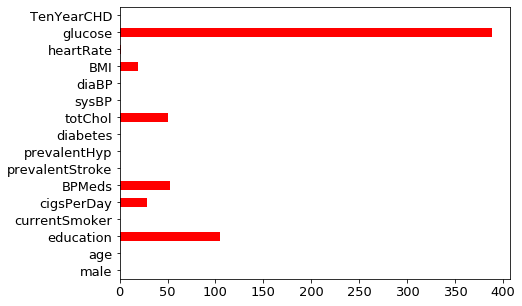

In [14]:
#Plotting the missing value information
miss = fram.isnull().sum()
miss.plot(kind='barh', figsize=(7,5), color="red", fontsize=13)
plt.show()

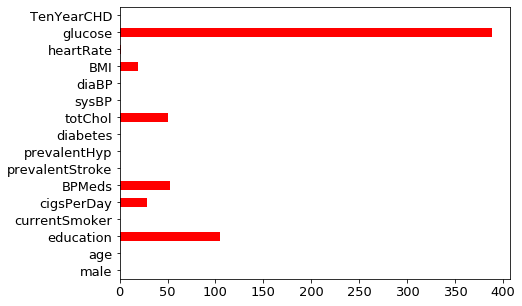

In [19]:
miss = fram.isnull().sum()
miss.plot(kind='barh', figsize=(7,5), color="red", fontsize=13)
plt.show()

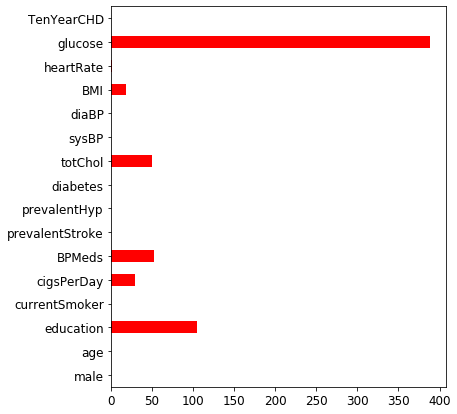

In [23]:
type(miss)
miss = fram.isnull().sum()
miss.plot(kind='barh',figsize=(6,7),color='red',fontsize=12)
plt.show()



In [104]:
#Getting the percentage of missing values
round(fram.isnull().sum()/len(fram.index)*100,3)

male               0.000
age                0.000
education          2.476
currentSmoker      0.000
cigsPerDay         0.684
BPMeds             1.250
prevalentStroke    0.000
prevalentHyp       0.000
diabetes           0.000
totChol            1.179
sysBP              0.000
diaBP              0.000
BMI                0.448
heartRate          0.024
glucose            9.151
TenYearCHD         0.000
dtype: float64

In [105]:
#Only the variables that contains the missing values
x = round((fram.isnull()).sum()/fram.shape[0]*100,3)
x[x>0]

education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

#### 2. Complete Case Analysis

In [111]:
#Complete case considering all the variables
fram2 = fram.dropna()

In [112]:
fram2.shape

(3658, 16)

In [113]:
fram.shape

(4240, 16)

In [29]:
4240 - 3658

582

In [114]:
fram.shape[0]-fram2.shape[0]

582

In [63]:
sum(fram.isnull().sum())

645

In [115]:
582*16-sum(fram.isnull().sum())

8667

In [116]:
(fram.shape[0]-fram2.shape[0])*fram.shape[1]-sum(fram.isnull().sum())

8667

In [73]:
(fram.shape[0]-fram2.shape[0])*fram.shape[1] - sum(fram.isnull().sum()) 

8667

In [71]:
sum(fram2.isnull().sum())

0

In [32]:
fram2.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [118]:
#Complete case considering a subset of variables
fram2 = fram.dropna(subset = ["totChol","BMI","glucose"])

In [3]:
fram.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [120]:
fram2.shape

(3828, 16)

In [ ]:
4240-3828

In [ ]:
(fram2.isnull()).sum()

#### 3. Mean or Median Imputation

In [33]:
#Making a copy of the data
fram3 = fram.copy()

In [54]:
#Mean of all the variables
fram3.mode()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,40,1.0,0,0.0,0.0,0,0,0,240.0,120.0,80.0,25.800801,75.0,75.0,0


In [40]:
#Imputing the missing values in the variable totChol using the mean
#Mean of age
fram3.totChol.mean()

236.69952267303108

In [6]:
fram.cigsPerDay.isnull().sum()


29

In [130]:
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [79]:
#Spotting the missing values in the variable age
fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
fram.cigsPerDay.isnull().sum()

29

In [132]:
fram.cigsPerDay.describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [7]:
fram.cigsPerDay

0        0.0
1        0.0
2       20.0
3       30.0
4       23.0
        ... 
4235    20.0
4236    15.0
4237     0.0
4238     0.0
4239    30.0
Name: cigsPerDay, Length: 4240, dtype: float64

In [38]:
#Checking if the missing values got imputed
fram3.totChol.isnull().sum()

0

In [137]:
fram.cigsPerDay.isnull().sum()

29

In [139]:
#Re-checking the mean of the variable
fram3.cigsPerDay.median()

0.0

In [136]:
fram3.age.mode()

0    40
dtype: int64

In [ ]:
fram.h

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019877EAADC8>]],
      dtype=object)

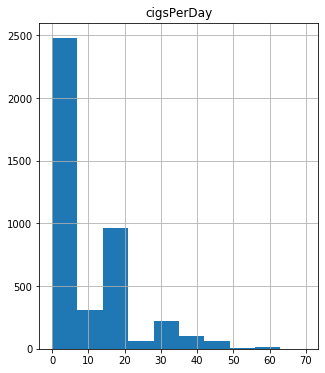

In [140]:
fram3.hist(column='cigsPerDay',figsize=(5,6))

In [43]:
#Impute the missing values of the variable BMI with median (Do Yourself)


fram3.BMI[fram3.BMI.isnull()] = fram3.BMI.mean()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
fram3.BMI.mean()

25.800800758114182

In [47]:
sum(fram3.BMI.isnull())

0

#### 4. Choosing Mean Imputation Vs Median Imputation

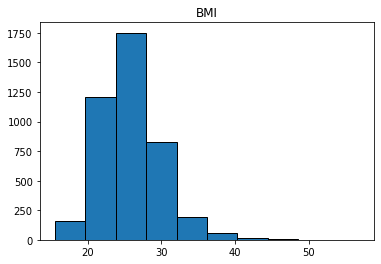

In [48]:
#Check the distribution of the variable - If highly skewed go for median
import matplotlib.pyplot as plt

fram.hist("BMI", grid=False, edgecolor="black")
plt.show()

In [49]:
print(fram.BMI.mean())
print(fram.BMI.median())

25.800800758114182
25.4


In [50]:
#Taking the log transformation of the variable
import numpy as np

fram["logBMI"] = np.log(fram.BMI)
fram.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,logBMI
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,3.294725
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,3.357942
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,3.232384
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,3.352707
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3.139833


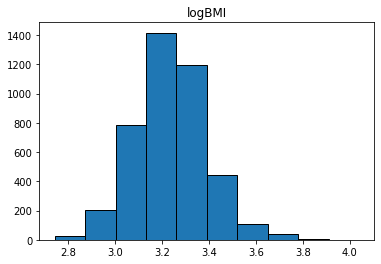

In [51]:
#Histogram of the log transformed variable
fram.hist("logBMI", grid=False, edgecolor="black")
plt.show()

In [52]:
print(np.log(fram.BMI.mean()))
print(np.log(fram.BMI.median()))

3.2504055285821383
3.2347491740244907


In [53]:
#Dropping logBMI
fram = fram.drop("logBMI", axis=1)
fram.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### 5. Imputation for Categorical Variable

In [88]:
#Mode imputation
pd.crosstab(fram3.education,columns="counts")/4240*100

col_0,counts
education,
1.0,40.566038
2.0,29.551887
3.0,16.250000
4.0,11.155660


In [ ]:
#Impute the missing values by the most frequent value
fram3["education"][fram3["education"].isnull()] = 1

In [ ]:
fram3.education[fram3.education.isnull()] = 1

In [87]:
pd.crosstab(fram3.education,columns="counts")

col_0,counts
education,
1.0,1720
2.0,1253
3.0,689
4.0,473


### Part B - Outlier Analysis

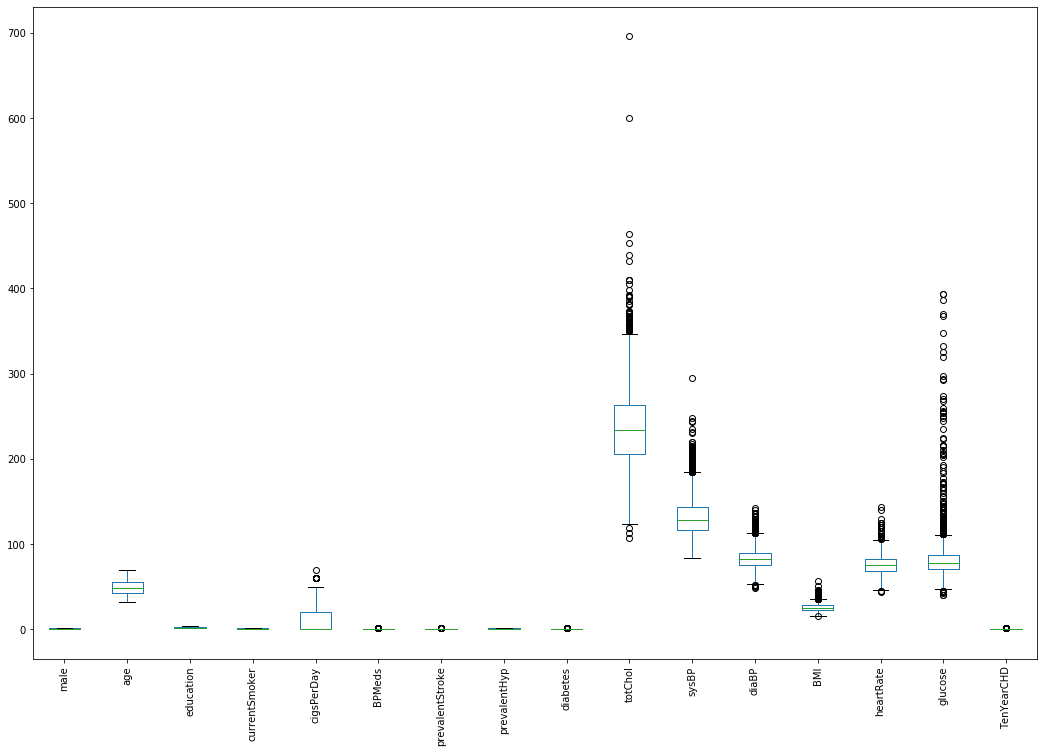

In [89]:
fram.boxplot(figsize=(18,12),rot=90,grid=False)
plt.show()

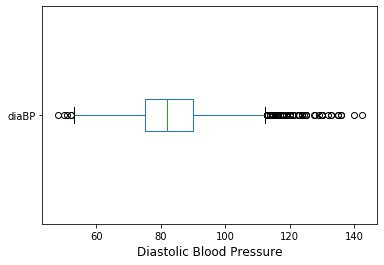

In [90]:
fram.boxplot(column='diaBP', grid=False, vert=False)

plt.xlabel('Diastolic Blood Pressure', fontsize=12)
plt.show()

In [95]:
#Upper and Lower benchmarks for outliers

iqr = fram.diaBP.quantile(0.75) - fram.diaBP.quantile(0.25)
ub = fram.diaBP.quantile(0.75) + 1.5*iqr      # Q3 + 1.5*IQR
lb = fram.diaBP.quantile(0.25) - 1.5*iqr      # Q1 - 1.5*IQR

(lb, ub)

(52.5, 112.5)

In [96]:
sum(fram.diaBP > ub)

72

In [93]:
sum(fram.diaBP < lb)

5

In [98]:
#WINSORIZATION
fram.diaBP[fram.diaBP < lb] = lb

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [99]:
fram.diaBP[fram.diaBP > ub] = ub

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


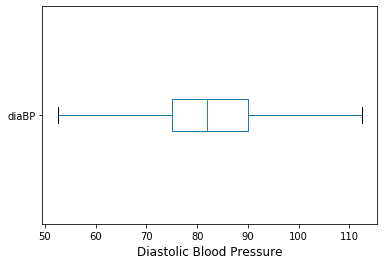

In [100]:
fram.boxplot(column='diaBP', grid=False, vert=False)

plt.xlabel('Diastolic Blood Pressure', fontsize=12)
plt.show()

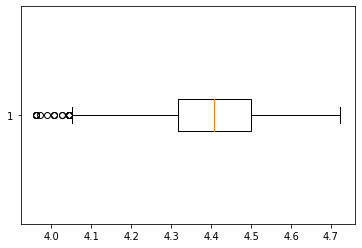

In [101]:
plt.boxplot(np.log(fram.diaBP), vert=False)
plt.show()

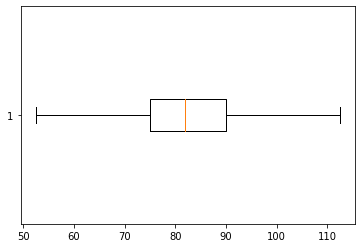

In [102]:
plt.boxplot(fram.diaBP, vert=False)
plt.show()

In [ ]:
import numpy as np